In [1]:
"""
cfg.py 

Simulation configuration for S1 model (using NetPyNE)
This file has sim configs as well as specification for parameterized values in netParams.py 

Contributors: salvadordura@gmail.com, fernandodasilvaborges@gmail.com
"""
# import matplotlib
import neuron
from netpyne import specs, sim
import os
from extracellular_stim_tools import apply_extracellular_stim

%matplotlib widget

cfg = specs.SimConfig()  

cfg.duration = 20 ## Duration of the sim, in ms  
cfg.dt = 0.025
cfg.seeds = {'conn': 4321, 'stim': 4321, 'loc': 4321} 
cfg.hParams = {'celsius': 34, 'v_init': -71}  
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True  

In [2]:
#--------------------------------------------------------------------------
# Recording 
#--------------------------------------------------------------------------
cells = [
    # "L1_NGC_DA_bNAC",
    "L23_PC_cADpyr", # L23_PC_cADpyr_1_cellParams.json
    # "L4_LBC_cACint",
    # "L5_TTPC2_cADpyr",
    # "L6_TPC_L1_cADpyr",
]
cell_ID = 1 # 1 through 5
cellNames = [f"{cell}_{cell_ID}" for cell in cells]
cellName = cellNames[0]

cfg.allpops = [cellName]

cfg.recordCells = cfg.allpops # record all cells                 
cfg.recordTraces = {'V_soma': {'sec':'soma_0', 'loc':0.5, 'var':'v'},
                    'V_axon_0': {'sec':'axon_0', 'loc':0.5, 'var':'v'},
                    'V_Myelin_0': {'sec':'Myelin_0', 'loc':0.5, 'var':'v'},
                    # 'V_Myelin_1': {'sec':'Myelin_1', 'loc':0.5, 'var':'v'},
                    # 'V_Myelin_10': {'sec':'Myelin_10', 'loc':0.5, 'var':'v'},
                    # 'V_Node_0': {'sec':'Node_0', 'loc':0.5, 'var':'v'},
                    # 'V_Node_1': {'sec':'Node_1', 'loc':0.5, 'var':'v'},
                    # 'V_Node_10': {'sec':'Node_10', 'loc':0.5, 'var':'v'},
                    # 'V_Unmyelin_0': {'sec':'Unmyelin_0', 'loc':0.5, 'var':'v'},
                    # 'V_Unmyelin_10': {'sec':'Unmyelin_10', 'loc':0.5, 'var':'v'},
                    # 'V_apic_0': {'sec':'apic_0', 'loc':0.5, 'var':'v'},
                    # 'V_apic_5': {'sec':'apic_5', 'loc':0.5, 'var':'v'},
                    # 'V_apic_95': {'sec':'apic_95', 'loc':0.5, 'var':'v'},                
                    # 'V_dend_0': {'sec':'dend_0', 'loc':0.5, 'var':'v'},
                    # 'V_dend_65': {'sec':'dend_65', 'loc':0.5, 'var':'v'},
                    'V_Node_69': {'sec':'Node_69', 'loc':0.5, 'var':'v'},
                    # 'V_Myelin_69': {'sec':'Myelin_69', 'loc':0.5, 'var':'v'},
                    'V_Node_265': {'sec':'Node_265', 'loc':0.5, 'var':'v'},
                    'V_Unmyelin_18': {'sec':'Unmyelin_18', 'loc':0.5, 'var':'v'},
                    }

cfg.recordStim = True
cfg.recordTime = True
cfg.recordStep = 0.025  

cfg.analysis['plotTraces'] = {'include': cfg.recordCells, 'oneFigPer': 'cell', 'overlay': True, 'saveFig': False, 'showFig': False, 'figSize':(12,6)} #'timeRange': [2000,cfg.duration], 

In [3]:
#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.simLabel = cellName
cfg.saveFolder = 'data/singleCellTMS/'+cfg.simLabel
cfg.savePickle = False         	## Save pkl file
cfg.saveJson = False	           	## Save json file
cfg.saveDataInclude = ['simData'] ## , 'netParams', 'simConfig', ,'simData'
cfg.backupCfgFile = None
cfg.gatherOnlySimData = False
cfg.saveCellSecs = True
cfg.saveCellConns = True

In [4]:
"""
netParams.py
"""
# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

netParams.scale = 1.0 # Scale factor for number of cells
netParams.sizeX = 420.0 # x-dimension (horizontal length) size in um
netParams.sizeY = 1082.0 # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 420.0 # z-dimension (horizontal depth) size in um
netParams.shape = 'cylinder' # cylindrical (column-like) volume

# r = 210 um and hexagonal side length = 230.9 um

In [5]:
#------------------------------------------------------------------------------
# General connectivity parameters
#------------------------------------------------------------------------------
netParams.defaultThreshold = -10.0 # spike threshold, 10 mV is NetCon default, lower it for all cells
netParams.defaultDelay = 0.1 # default conn delay (ms)
netParams.propVelocity = 300.0 #  300 μm/ms (Stuart et al., 1997)
netParams.scaleConnWeightNetStims = 0.001  # weight conversion factor (from nS to uS)

In [6]:
#------------------------------------------------------------------------------
# Population parameters
#------------------------------------------------------------------------------

netParams.popParams[cellName] = {'cellType': cellName, 'cellModel': 'HH_full', 'numCells': 1}
netParams.loadCellParamsRule(label = cellName, fileName = f'cells/{cellName}_cellParams.json') 
netParams.cellParams[cellName]['conds']['cellType'] = cellName

In [7]:
#------------------------------------------------------------------------------
# External Stimulation
#------------------------------------------------------------------------------

# With a somatodendritic axis pointing to +y:
# At a polar angle of 0, the field points to +y (out of brain); at 180, to -y (into brain)
# With a polar angle of 90, an azimuthal angle of 0 points to +x; at azimuth of 90, to -z

cfg.tms_params = dict(
        # Coupling params
        decay_rate_percent_per_mm=50,
        E_field_dir={'Coord_type': 'Spherical',
                     'Polar': 180,
                     'Azimuthal': 90,},
        # E_field_dir={'Coord_type': 'Cartesian',
        #              'X': 1,
        #              'Y': 0,
        #              'Z': 0,},
        decay_dir={'Coord_type': 'Spherical',
                   'Polar': 180,
                   'Azimuthal': 0,},
        somatodendritic_axis=[0, 1, 0],
        # Waveform params
        stim_type='sTMS',
        simulation_duration_ms=cfg.duration,
        stim_start_ms=10.,
        efield_amplitude_V_per_m=100.,
        num_pulses_per_burst=1,
        tms_pulse_width_ms=15.,
        tms_pulse_shape="Ideal_Square",   
        # Plotting quasipotentials
        plot=True,
        saveplot='quasipotentials.html',
    )

In [8]:
plotshape_Video = 0

# Try to narrow down to ~5 ms
recordStart = 99
record_Time = 5
recordEnd = recordStart + record_Time

if plotshape_Video:
    dir1 = cfg.saveFolder
    try: os.mkdir(dir1) 
    except: pass
    dir2 = f'{dir1}/voltage_movie'
    try: os.mkdir(dir2) 
    except: pass
    run_num = len(os.listdir(dir2))
    dir3 = f'{dir2}/run_{run_num}'

    os.mkdir(dir3)
    dir4 = f'{dir3}/images'
    os.mkdir(dir4)
    cfg.saveFolder = dir4

    def modifyMechsFunc(simTime):
        t = simTime

        if t >= recordStart and t <= recordEnd:
            print(t)

            sim.gatherData()
            # sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
            # sim.analysis.plotData()         			# plot spike raster etc

            sim.analysis.plotShape(includePre=[cellName], includePost=[cellName], includeAxon=True, showSyns=False, showElectrodes=False,
                                    cvar= 'voltage', dist=0.6, elev=95, azim=-90, 
                                    axisLabels=True, synStyle='o', 
                                    clim= [-62, 54], showFig=False, synSize=2, saveFig='movie', figSize=(12,12))#f'{dir4}/t{round(t, 3)}sec.png'


Start time:  2025-01-12 14:15:05.973786

Creating network of 1 cell populations on 1 hosts...
  Number of cells on node 0: 1 
  Done; cell creation time = 0.05 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
  Number of stims on node 0: 0 
  Done; cell stims creation time = 0.00 s.
Recording 7 traces of 7 types on node 0
Applying extracellular stim (sTMS) to network...
0.025


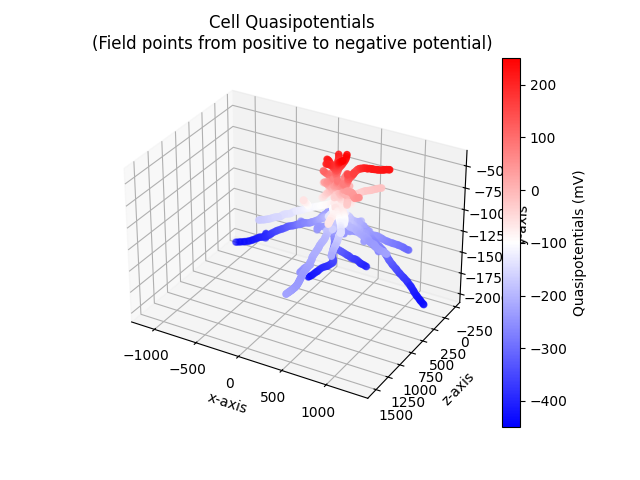

In [9]:
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params

sim.net.createPops()               			# instantiate network populations
sim.net.createCells();              		# instantiate network cells based on defined populations
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)
sim.net.defineCellShapes()

interval_func = apply_extracellular_stim(
        # List of cells to apply stim to
        cells_list=sim.net.cells, 
        **cfg.tms_params
    )

In [10]:
if plotshape_Video:
    sim.runSimWithIntervalFunc(0.1, modifyMechsFunc)       # run parallel Neuron simulation (calling func to modify mechs)
else:
    sim.runSimWithIntervalFunc(0.1, interval_func)

sim.gatherData()                  			# gather spiking data and cell info from each node
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#


Running with interval func using NEURON for 20.0 ms...
  Done; run time = 0.73 s; real-time ratio: 0.03.

Gathering data...
  Done; gather time = 0.05 s.

Analyzing...
  Cells: 1
  Connections: 0 (0.00 per cell)
  Spikes: 1 (50.00 Hz)
  Simulated time: 0.0 s; 1 workers
  Run time: 0.73 s


[]

Plotting recorded cell traces ... cell
  Done; plotting time = 0.03 s


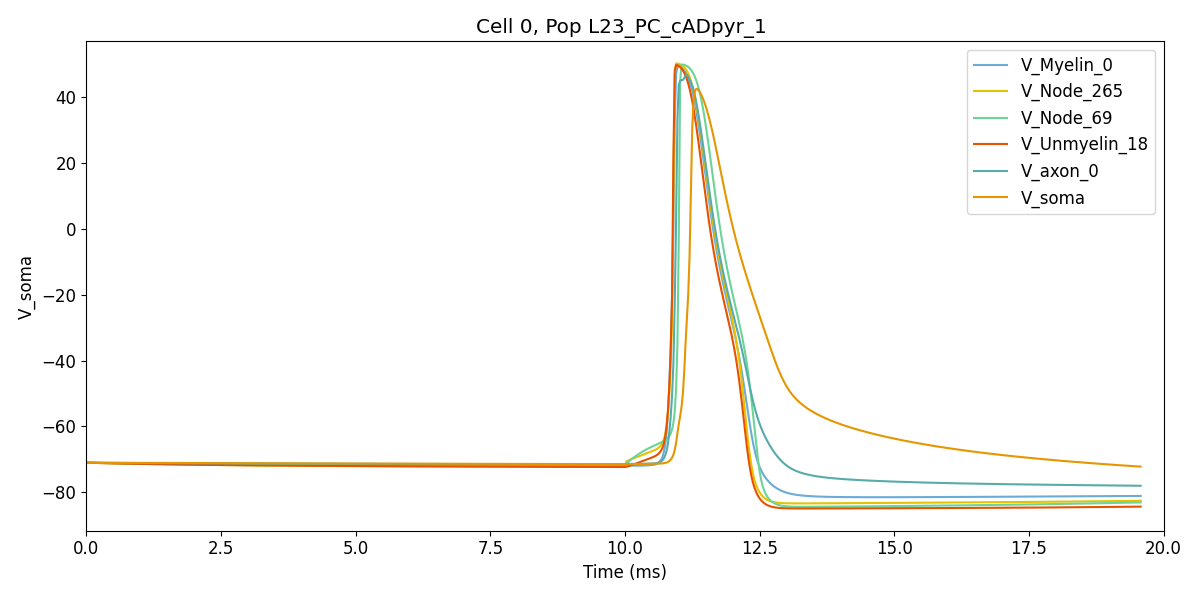

In [11]:
sim.analysis.plotData()

In [12]:
if plotshape_Video:
    import imageio

    images = []
    for f in os.listdir(dir4):
        images.append(imageio.imread(f'{dir4}/{f}'))
    imageio.mimsave(f'{dir3}/run_{run_num}.gif', images)

Plotting recorded cell traces ... cell


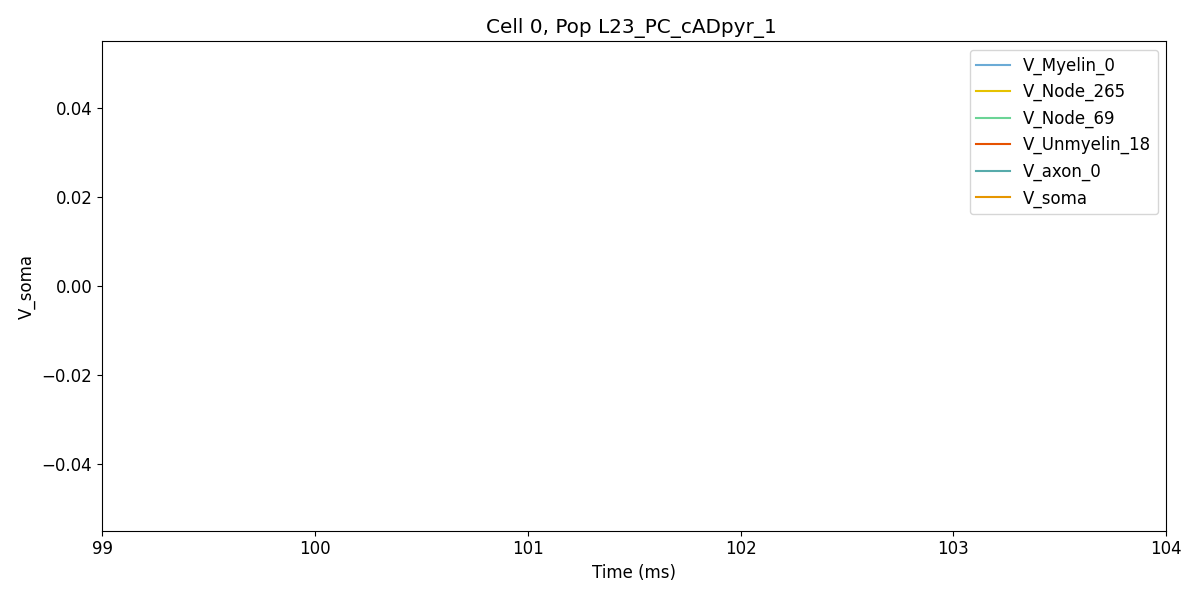

({'_gid_0': <Figure size 1200x600 with 1 Axes>},
 {'tracesData': [{'t': array([ 99.   ,  99.025,  99.05 ,  99.075,  99.1  ,  99.125,  99.15 ,
            99.175,  99.2  ,  99.225,  99.25 ,  99.275,  99.3  ,  99.325,
            99.35 ,  99.375,  99.4  ,  99.425,  99.45 ,  99.475,  99.5  ,
            99.525,  99.55 ,  99.575,  99.6  ,  99.625,  99.65 ,  99.675,
            99.7  ,  99.725,  99.75 ,  99.775,  99.8  ,  99.825,  99.85 ,
            99.875,  99.9  ,  99.925,  99.95 ,  99.975, 100.   , 100.025,
           100.05 , 100.075, 100.1  , 100.125, 100.15 , 100.175, 100.2  ,
           100.225, 100.25 , 100.275, 100.3  , 100.325, 100.35 , 100.375,
           100.4  , 100.425, 100.45 , 100.475, 100.5  , 100.525, 100.55 ,
           100.575, 100.6  , 100.625, 100.65 , 100.675, 100.7  , 100.725,
           100.75 , 100.775, 100.8  , 100.825, 100.85 , 100.875, 100.9  ,
           100.925, 100.95 , 100.975, 101.   , 101.025, 101.05 , 101.075,
           101.1  , 101.125, 101.15 , 101.17

In [13]:
tuning = 0

plotStart = recordStart
plotEnd = recordEnd

if tuning:
    plotStart = 49
    plotEnd = 54

# sim.analysis.plotTraces(timeRange=[391,394.5],figSize=(24,5), overlay=True);
sim.analysis.plotTraces(timeRange=[plotStart,plotEnd],figSize=(12,6), overlay=True)

Plotting 3D cell shape ...

There was an exception in plotShape()


Traceback (most recent call last):
  File "c:\Users\jacob\anaconda3\Lib\site-packages\netpyne\analysis\utils.py", line 87, in wrapper
    return function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jacob\anaconda3\Lib\site-packages\netpyne\plotting\plotShape.py", line 198, in plotShape
    morph.shapeplot(h, shapeax, sections=secs, cvals=cvals, cmap=cmap, clim=clim)
  File "c:\Users\jacob\anaconda3\Lib\site-packages\netpyne\support\morphology.py", line 352, in shapeplot
    if isinstance(cvals[i], numbers.Number):
                  ~~~~~^^^
IndexError: list index out of range


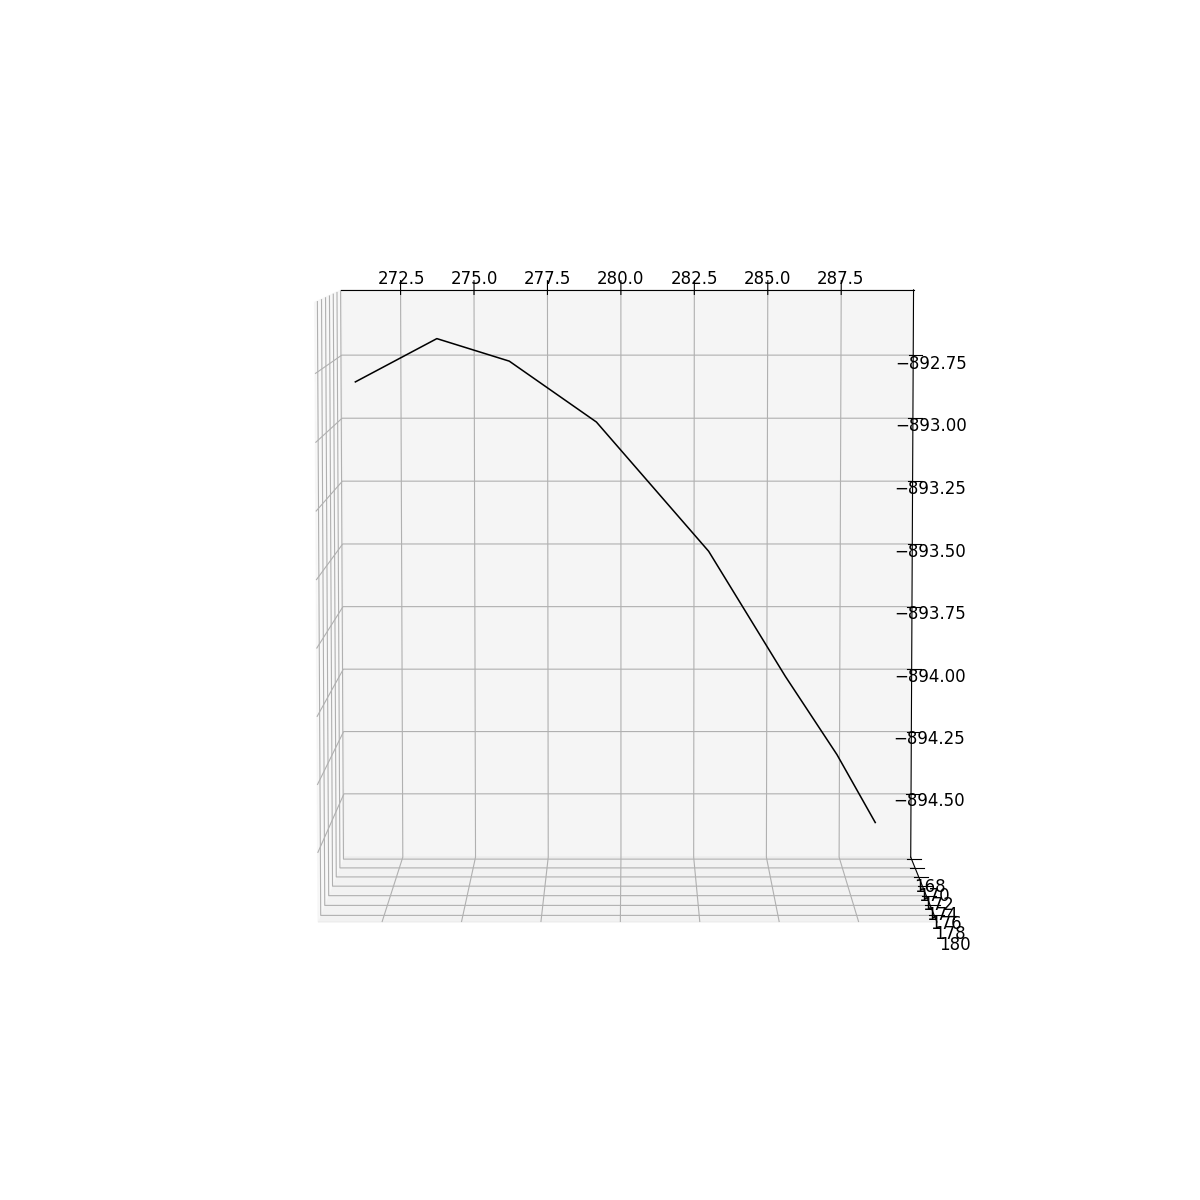

In [14]:
sim.analysis.plotShape(includePre=[cellName], includePost=[cellName], includeAxon=True, showSyns=False, showElectrodes=False,
    cvar='extracellular', dist=0.6, elev=95, azim=-90, 
    axisLabels=True, synStyle='o', 
    clim= [-62, 54], showFig=False, synSize=2, saveFig=False, figSize=(12,12));